In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup
from nltk.stem import WordNetLemmatizer
import string

In [2]:
df=pd.read_csv('imdb_sen.csv')
df.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [3]:
df.shape

(50000, 2)

In [4]:
#checking missing values
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [5]:
#check for duplicate values
df.duplicated().sum()

418

In [6]:
df.drop_duplicates(subset ="review",
                     keep ='first', inplace = True)

In [7]:
df.shape

(49582, 2)

In [8]:
df['sentiment'].value_counts()

positive    24884
negative    24698
Name: sentiment, dtype: int64

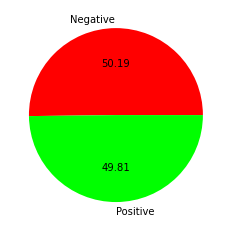

In [9]:
plt.pie(df['sentiment'].value_counts(),labels=['Negative','Positive'],colors=['red','lime'],autopct="%0.2f")
plt.show()

# Data Cleaning

In [10]:
#removing htmltags
from bs4 import BeautifulSoup
def remove_html_tags(text):
    soup = BeautifulSoup(text, 'html.parser')
    return soup.get_text()

In [11]:
df['review'] = df['review'].apply(remove_html_tags)
df.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. The filming tec...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [12]:
import contractions
import re

def preprocessor(text):
    text = contractions.fix(text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',
                           text)
    text = (re.sub('[\W]+', ' ', text.lower()) +
            ' '.join(emoticons).replace('-', ''))
    return text

In [13]:
df['review'] = df['review'].apply(preprocessor)

In [15]:
df.head(10)

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tech...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there is a family where a little boy...,negative
4,petter mattei s love in the time of money is a...,positive
5,probably my all time favorite movie a story of...,positive
6,i sure would like to see a resurrection of a u...,positive
7,this show was an amazing fresh innovative idea...,negative
8,encouraged by the positive comments about this...,negative
9,if you like original gut wrenching laughter yo...,positive


In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["sentiment"] = le.fit_transform(df["sentiment"])
df.head(10)

,review,sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production the filming tech...,1
2,i thought this was a wonderful way to spend ti...,1
3,basically there is a family where a little boy...,0
4,petter mattei s love in the time of money is a...,1
5,probably my all time favorite movie a story of...,1
6,i sure would like to see a resurrection of a u...,1
7,this show was an amazing fresh innovative idea...,0
8,encouraged by the positive comments about this...,0
9,if you like original gut wrenching laughter yo...,1


In [17]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [18]:
pos_wc = wc.generate(df[df['sentiment'] == 1]['review'].str.cat(sep=" "))

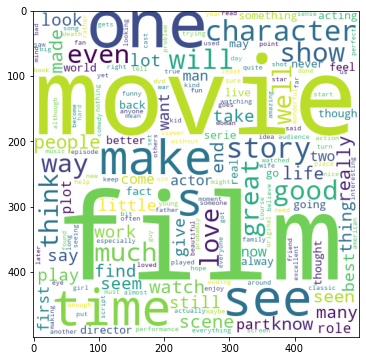

In [19]:
plt.figure(figsize=(15,6))
plt.imshow(pos_wc)

In [21]:
neg_wc = wc.generate(df[df['sentiment'] == 0]['review'].str.cat(sep=" "))

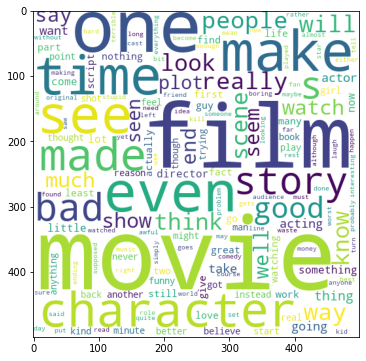

In [22]:
plt.figure(figsize=(15,6))
plt.imshow(neg_wc)

In [23]:
def preprocess_text(text):
    # Tokenize the text into individual words
    tokens = word_tokenize(text.lower())

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words]

    # Lemmatize the remaining words
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    # Join the lemmatized tokens back into a single string
    preprocessed_text = ' '.join(lemmatized_tokens)
    return preprocessed_text

In [24]:
df['review'] = df['review'].apply(preprocess_text)

In [25]:
df.head(10)

,review,sentiment
0,one reviewer mentioned watching 1 oz episode h...,1
1,wonderful little production filming technique ...,1
2,thought wonderful way spend time hot summer we...,1
3,basically family little boy jake think zombie ...,0
4,petter mattei love time money visually stunnin...,1
5,probably time favorite movie story selflessnes...,1
6,sure would like see resurrection dated seahunt...,1
7,show amazing fresh innovative idea 70 first ai...,0
8,encouraged positive comment film looking forwa...,0
9,like original gut wrenching laughter like movi...,1


In [26]:
print(df['review'][111])

liked boyle performance positive thing say everything overdone point absurdity actor spoke like would expect 9 year old nephew speak pretending jaded stone hearted cop ultra evil villain raspy voice over seemed amateurish could go buy cheap synthesizer crank better opening music whole 1984ish police torture stuff totally superfluous nothing actual event story cox added lot thing fact apparently thought would really cool nothing story big disappointment one thing make borges story good minimalism tightly bound superfluous detail movie opposite stopped watching scene lonnrot questioning guy yidische zaitung thereabouts wasted 4 renting least get satisfaction writing review hopefully saving others making mistake


In [27]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df=2, max_df=0.5, ngram_range=(1,2))
text_count_matrix = tfidf.fit_transform(df.review)

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(text_count_matrix, df.sentiment, test_size=0.20, random_state=2)

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,classification_report

In [30]:
knc=KNeighborsClassifier()
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(C= 1, penalty= 'l2', solver= 'saga')
rfc=RandomForestClassifier(n_estimators=50, random_state=2)
lsvc=LinearSVC()

In [31]:
clfs = {
    'KN' : knc, 
    'MNB': mnb,
    'BNB':bnb,
    'DT': dtc, 
    'LR': lrc, 
    'RF':rfc,
    'LSVC':lsvc
}

In [32]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [33]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  KN
Accuracy -  0.7829988907935868
Precision -  0.7491638795986622
For  MNB
Accuracy -  0.888575173943733
Precision -  0.883960396039604
For  BNB
Accuracy -  0.8843400221841282
Precision -  0.8904723127035831
For  DT
Accuracy -  0.690632247655541
Precision -  0.6348401633572737
For  LR
Accuracy -  0.8958354341030553
Precision -  0.8824554608830364
For  RF
Accuracy -  0.8538872642936371
Precision -  0.8552472858866104
For  LSVC
Accuracy -  0.9108601391549864
Precision -  0.9013119248090856


In [34]:
lsvc.fit(x_train,y_train)
y_pred = lsvc.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

0.9108601391549864
[[4430  504]
 [ 380 4603]]
0.9013119248090856
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      4934
           1       0.90      0.92      0.91      4983

    accuracy                           0.91      9917
   macro avg       0.91      0.91      0.91      9917
weighted avg       0.91      0.91      0.91      9917



In [35]:
import pickle

In [36]:
pickle.dump(tfidf,open('vectorizer1.pkl','wb'))
pickle.dump(lsvc,open('model1.pkl','wb'))

In [37]:
def clean_review(text):
    soup = BeautifulSoup(text, 'html.parser')
    text=soup.get_text()
    text = contractions.fix(text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',
                           text)
    text = (re.sub('[\W]+', ' ', text.lower()) +
            ' '.join(emoticons).replace('-', ''))
    tokens = word_tokenize(text.lower())

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words]

    # Lemmatize the remaining words
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    # Join the lemmatized tokens back into a single string
    preprocessed_text = ' '.join(lemmatized_tokens)
    return preprocessed_text
    

In [38]:
text="This is a tough movie to explain. I can’t say there was a part of Thor: Love & Thunder I didn’t enjoy, but I also left the theater feeling unsatisfied. There were great parts! The space goats and Thor’s jealous battle ax were highlights. There was a big fight scene with some of the best special effects in a Marvel movie to date. But the ending felt sudden and disappointed me, while the movie overall lacked something that made me connect and care about the plot."

In [43]:
print(clean_review(text))

tough movie explain say part thor love thunder enjoy also left theater feeling unsatisfied great part space goat thor jealous battle ax highlight big fight scene best special effect marvel movie date ending felt sudden disappointed movie overall lacked something made connect care plot


In [44]:
vector_input = tfidf.transform([clean_review(text)])

In [45]:
result = lsvc.predict(vector_input)[0]

In [46]:
print(result)

0


In [47]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC

# Train a LinearSVC classifier
clf = LinearSVC()
clf.fit(x_train, y_train)

# Wrap the classifier in a CalibratedClassifierCV object
calibrated_clf = CalibratedClassifierCV(clf, cv=5, method='sigmoid')
calibrated_clf.fit(x_train, y_train)

CalibratedClassifierCV(base_estimator=LinearSVC(), cv=5)

In [48]:
sentiment_prob = calibrated_clf.predict_proba(vector_input)[:, 1][0]

In [49]:
print(sentiment_prob)

0.4209890233083969


In [50]:
y_proba = calibrated_clf.predict_proba(x_test)

In [51]:
print(y_proba)

[[0.9963698  0.0036302 ]
 [0.85020316 0.14979684]
 [0.99013476 0.00986524]
 ...
 [0.17623737 0.82376263]
 [0.11317058 0.88682942]
 [0.01543266 0.98456734]]


In [52]:
result = calibrated_clf.predict(vector_input)[0]

In [53]:
print(result)

0


In [54]:
calibrated_clf.fit(x_train,y_train)
y_pred = calibrated_clf.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

0.9095492588484421
[[4443  491]
 [ 406 4577]]
0.9031176006314128
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      4934
           1       0.90      0.92      0.91      4983

    accuracy                           0.91      9917
   macro avg       0.91      0.91      0.91      9917
weighted avg       0.91      0.91      0.91      9917



In [55]:
pickle.dump(calibrated_clf,open('modelc.pkl','wb'))